# Importing required library 

In [1]:
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

chat gpt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# reading the file

In [94]:
df = pd.read_csv('Dataset.csv')
df=df[:2000]
df

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable i love very ...
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrade original i 've mine couple ...
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,missing information use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we set two months
...,...,...,...,...,...
1995,1995,Home_and_Kitchen_5,5.0,OR,solid build quality works well cooking things ...
1996,1996,Home_and_Kitchen_5,5.0,OR,nice sturdy size shape comes handy 1-cup small...
1997,1997,Home_and_Kitchen_5,5.0,OR,this great heater bedrooms small medium rooms ...
1998,1998,Home_and_Kitchen_5,5.0,OR,please note single large 3d skull smaller mult...


In [95]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [96]:
df.dropna()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable i love very ...
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original i 've mine couple ...
2,Home_and_Kitchen_5,5.0,CG,this pillow saved back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price i
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we set two months
...,...,...,...,...
1995,Home_and_Kitchen_5,5.0,OR,solid build quality works well cooking things ...
1996,Home_and_Kitchen_5,5.0,OR,nice sturdy size shape comes handy 1-cup small...
1997,Home_and_Kitchen_5,5.0,OR,this great heater bedrooms small medium rooms ...
1998,Home_and_Kitchen_5,5.0,OR,please note single large 3d skull smaller mult...


In [97]:
df['length'] = df['text_'].apply(len)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  2000 non-null   object 
 1   rating    2000 non-null   float64
 2   label     2000 non-null   object 
 3   text_     2000 non-null   object 
 4   length    2000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 78.2+ KB


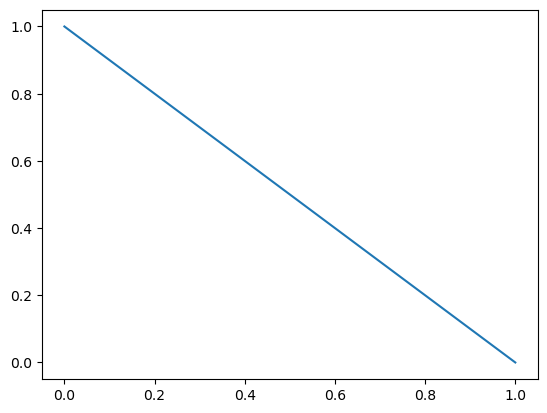

In [99]:
plt.plot(df['label']=="OR",df['label']=="CG")
plt.show()


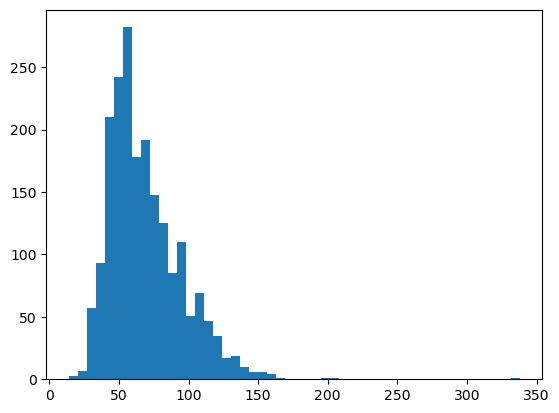

In [100]:
plt.hist(df['length'],bins=50)
plt.show()

In [101]:
df.groupby('label').describe()

rating                                            length          \
        count   mean       std  min  25%  50%  75%  max   count    mean   
label                                                                     
CG     1000.0  4.397  1.113836  1.0  4.0  5.0  5.0  5.0  1000.0  60.288   
OR     1000.0  4.383  1.120521  1.0  4.0  5.0  5.0  5.0  1000.0  77.267   

                                                 
             std   min   25%   50%   75%    max  
label                                            
CG     16.415984  23.0  49.0  57.0  70.0  128.0  
OR     31.357184  14.0  53.0  74.0  98.0  338.0

In [102]:
df.length.describe()

count    2000.000000
mean       68.777500
std        26.422965
min        14.000000
25%        50.000000
50%        63.000000
75%        84.000000
max       338.000000
Name: length, dtype: float64

In [103]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [104]:
bow_transformer = CountVectorizer(analyzer=text_process)


In [105]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 3355


In [106]:
tdata = df['text_']
tdata

0       love well made sturdy comfortable i love very ...
1       love great upgrade original i 've mine couple ...
2          this pillow saved back i love look feel pillow
3           missing information use great product price i
4            very nice set good quality we set two months
                              ...                        
1995    solid build quality works well cooking things ...
1996    nice sturdy size shape comes handy 1-cup small...
1997    this great heater bedrooms small medium rooms ...
1998    please note single large 3d skull smaller mult...
1999    i thought would perfect keep work filtered wat...
Name: text_, Length: 2000, dtype: object

In [107]:
bow_msg4 = bow_transformer.transform([tdata])
print(bow_msg4)
print(bow_msg4.shape)
bow_msg4

  (0, 1)	1
  (0, 3)	1
  (0, 7)	1
  (0, 8)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 18)	2
  (0, 19)	2
  (0, 21)	1
  (0, 23)	1
  (0, 24)	2
  (0, 27)	1
  (0, 28)	12
  (0, 29)	1
  (0, 30)	1
  (0, 31)	10
  (0, 33)	1
  (0, 34)	1
  (0, 35)	1
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 40)	1
  (0, 41)	2
  :	:
  (0, 3322)	1
  (0, 3323)	4
  (0, 3324)	1
  (0, 3327)	2
  (0, 3329)	17
  (0, 3330)	33
  (0, 3332)	1
  (0, 3333)	8
  (0, 3334)	3
  (0, 3335)	1
  (0, 3336)	17
  (0, 3337)	1
  (0, 3339)	1
  (0, 3340)	1
  (0, 3341)	1
  (0, 3342)	1
  (0, 3343)	3
  (0, 3347)	1
  (0, 3348)	2
  (0, 3349)	3
  (0, 3350)	1
  (0, 3351)	1
  (0, 3352)	1
  (0, 3353)	1
  (0, 3354)	1
(1, 3355)


<1x3355 sparse matrix of type '<class 'numpy.int64'>'
	with 2969 stored elements in Compressed Sparse Row format>

In [108]:
print(bow_transformer.get_feature_names()[1906])
print(bow_transformer.get_feature_names()[1908])

noise
non


In [109]:
bow_reviews = bow_transformer.transform(df['text_'])

In [110]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (2000, 3355)
Amount of non zero values in the bag of words model: 18715


In [111]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.28


In [112]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 1)	1
  (0, 3)	1
  (0, 7)	1
  (0, 8)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 18)	2
  (0, 19)	2
  (0, 21)	1
  (0, 23)	1
  (0, 24)	2
  (0, 27)	1
  (0, 28)	12
  (0, 29)	1
  (0, 30)	1
  (0, 31)	10
  (0, 33)	1
  (0, 34)	1
  (0, 35)	1
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 40)	1
  (0, 41)	2
  :	:
  (0, 3322)	1
  (0, 3323)	4
  (0, 3324)	1
  (0, 3327)	2
  (0, 3329)	17
  (0, 3330)	33
  (0, 3332)	1
  (0, 3333)	8
  (0, 3334)	3
  (0, 3335)	1
  (0, 3336)	17
  (0, 3337)	1
  (0, 3339)	1
  (0, 3340)	1
  (0, 3341)	1
  (0, 3342)	1
  (0, 3343)	3
  (0, 3347)	1
  (0, 3348)	2
  (0, 3349)	3
  (0, 3350)	1
  (0, 3351)	1
  (0, 3352)	1
  (0, 3353)	1
  (0, 3354)	1


In [113]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (2000, 3355)
No. of Dimensions: 2


# spliting data  for test and train

In [114]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.50)

# Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [115]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [116]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002306154DE50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [117]:
MultNB = pipeline.predict(review_test)
MultNB

array(['OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'OR', 'OR',
       'CG', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG',
       'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR',
       'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG',
       'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG',
       'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'OR', 'OR',
       'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG',
       'CG', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'CG', 'CG',
       'OR', 'OR', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR',
       'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'C

In [118]:
print('Classification Report:',classification_report(label_test,MultNB))
print('Confusion Matrix:',confusion_matrix(label_test,MultNB))
print('Accuracy Score:',accuracy_score(label_test,MultNB))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,MultNB)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.57      0.94      0.71       468
          OR       0.88      0.39      0.54       532

    accuracy                           0.65      1000
   macro avg       0.73      0.66      0.63      1000
weighted avg       0.74      0.65      0.62      1000

Confusion Matrix: [[441  27]
 [326 206]]
Accuracy Score: 0.647
Model Prediction Accuracy: 64.7%


# Random forest classifier

In [119]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [120]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002306154DE50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [121]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'OR', 'CG', 'OR', 'CG',
       'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'CG',
       'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR',
       'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'CG', 'CG', 'CG',
       'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG', 'OR',
       'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'CG',
       'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'OR', 'CG', 'CG', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG',
       'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR',
       'OR', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'OR', 'CG',
       'OR', 'OR', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR',
       'OR', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'C

In [122]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.65      0.85      0.74       468
          OR       0.82      0.60      0.69       532

    accuracy                           0.72      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.74      0.72      0.71      1000

Confusion Matrix: [[396  72]
 [211 321]]
Accuracy Score: 0.717
Model Prediction Accuracy: 71.7%


# DecisionTreeClassifier

In [123]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [124]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002306154DE50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [125]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'CG', 'OR', 'CG', 'CG',
       'CG', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'CG',
       'CG', 'OR', 'CG', 'CG', 'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR',
       'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'CG', 'OR', 'OR', 'OR',
       'CG', 'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR',
       'CG', 'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'CG', 'CG', 'CG',
       'OR', 'CG', 'OR', 'CG', 'OR', 'CG', 'CG', 'OR', 'OR', 'CG', 'CG',
       'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'CG',
       'OR', 'CG', 'OR', 'CG', 'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'CG', 'OR', 'CG',
       'CG', 'CG', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR',
       'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'OR', 'CG', 'CG', 'OR', 'CG',
       'OR', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR',
       'OR', 'OR', 'CG', 'CG', 'OR', 'OR', 'OR', 'C

In [126]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.64      0.72      0.68       468
          OR       0.73      0.64      0.68       532

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.68      0.68      1000

Confusion Matrix: [[339 129]
 [191 341]]
Accuracy Score: 0.68
Model Prediction Accuracy: 68.0%


# KNeighborsClassifier

In [127]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [128]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002306154DE50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [129]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG',
       'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR',
       'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG',
       'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG',
       'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'CG',
       'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'C

In [130]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
    

Classification Report:               precision    recall  f1-score   support

          CG       0.51      0.95      0.66       468
          OR       0.80      0.19      0.31       532

    accuracy                           0.55      1000
   macro avg       0.66      0.57      0.49      1000
weighted avg       0.66      0.55      0.47      1000

Confusion Matrix: [[443  25]
 [430 102]]
Accuracy Score: 0.545
Model Prediction Accuracy: 54.5%


# SVC

In [131]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [132]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002306154DE50>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [133]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR',
       'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG',
       'CG', 'CG', 'OR', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'CG', 'OR',
       'CG', 'OR', 'CG', 'CG', 'OR', 'OR', 'OR', 'CG', 'CG', 'CG', 'CG',
       'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG', 'OR',
       'OR', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR', 'CG', 'OR', 'OR', 'CG',
       'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'OR',
       'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR',
       'OR', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'OR', 'CG',
       'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR',
       'OR', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'C

In [134]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.76      0.77      0.77       468
          OR       0.80      0.79      0.79       532

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

Confusion Matrix: [[360 108]
 [111 421]]
Accuracy Score: 0.781
Model Prediction Accuracy: 78.1%


In [135]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [136]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002306154DE50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [142]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'CG', 'CG',
       'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR',
       'OR', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG',
       'CG', 'CG', 'OR', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'OR', 'OR',
       'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'OR',
       'OR', 'CG', 'CG', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG',
       'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'OR',
       'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR',
       'OR', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'OR', 'CG',
       'OR', 'OR', 'OR', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR',
       'OR', 'OR', 'OR', 'CG', 'OR', 'CG', 'CG', 'C

In [138]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.72      0.81      0.76       468
          OR       0.81      0.72      0.76       532

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.77      0.76      0.76      1000

Confusion Matrix: [[378  90]
 [148 384]]
Accuracy Score: 0.762
Model Prediction Accuracy: 76.2%


# Conclusion

In [139]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,MultNB)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 76.2%
K Nearest Neighbors Prediction Accuracy: 54.5%
Decision Tree Classifier Prediction Accuracy: 68.0%
Random Forests Classifier Prediction Accuracy: 71.7%
Support Vector Machines Prediction Accuracy: 78.1%
Multinomial Naive Bayes Prediction Accuracy: 64.7%
